<h1 align="center">Read, crop, rotate, scale, timestamp, and make a movie</h1>

## Summary:

This notebook is designed to help you start doing basic image-processing in Python using opencv and ffmpeg, including following steps:

- **Read and display a sample image**
- **crop and rotate a sample image**
- **put a scale and timestamp on the sample image**
- **apply the changes based on the sample image to a set** 
- **make a movie using ffmpeg**



- The corresponding set of images is stored in a folder called './Data/read-crop-rotate/raw-images/'.
- These images show the evaporation process of a liquid droplet in a capillary with.
- The outer diameter of the capillary is 2mm.
- The images are taken every 40 seconds and are saved as IMG_0039.JPG, IMG_0040.JPG, ..., IMG_0059.JPG.

### packages:

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Read and Show the sample image, i.e. the first image IMG_0039.JPG:

In [3]:
image_name = 'IMG_0039.JPG'
image_path = './Data/read-crop-rotate/raw-images/'
img = cv2.imread(image_path+image_name, 0)

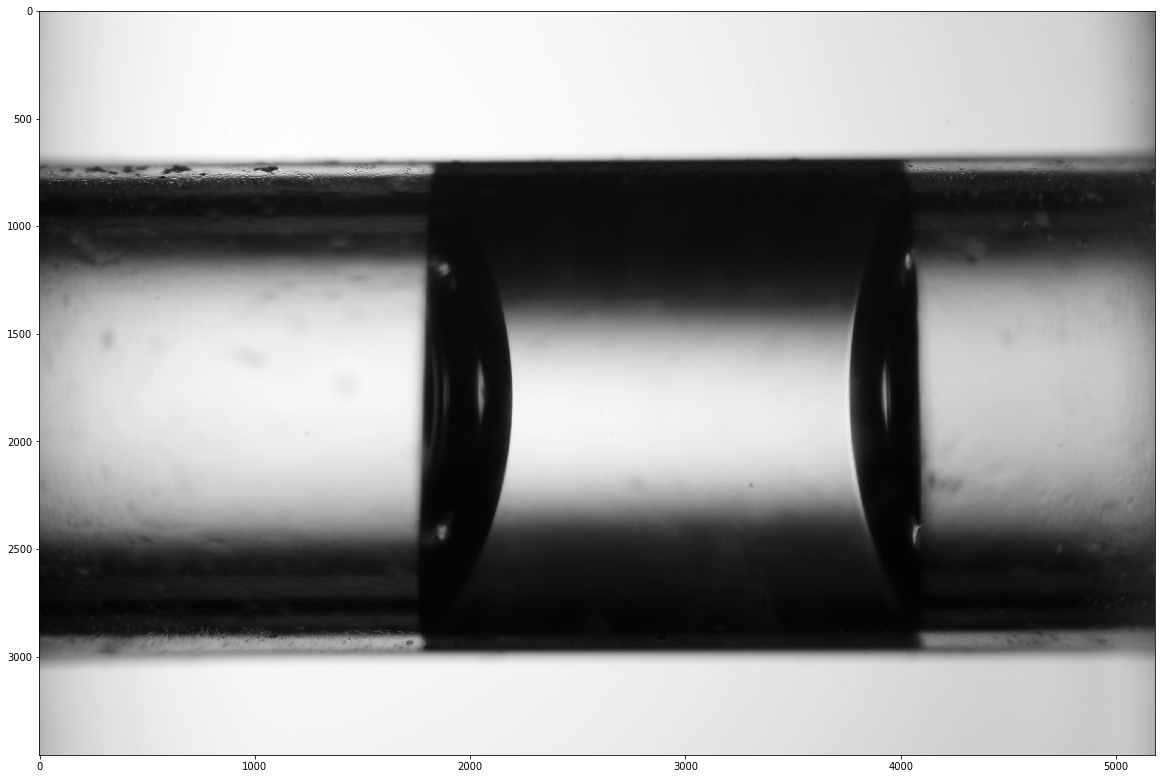

In [4]:
fig01 = plt.figure(1, figsize=(20, 30), dpi=90)
plt.subplot(111)
plt.imshow(img, cmap = 'gray')
plt.show()

## Rotate the image to get a fully horizontal tube:

In [5]:
# Following function rotates the image 'angle' degrees ccw around the center
def rotateImage(image, angle):
    rows,cols = img.shape
    rot_mat = cv2.getRotationMatrix2D((cols/2,rows/2), angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, (cols,rows))
    return result

In [6]:
rot_angle = -0.5
rot_img = rotateImage(img, rot_angle)

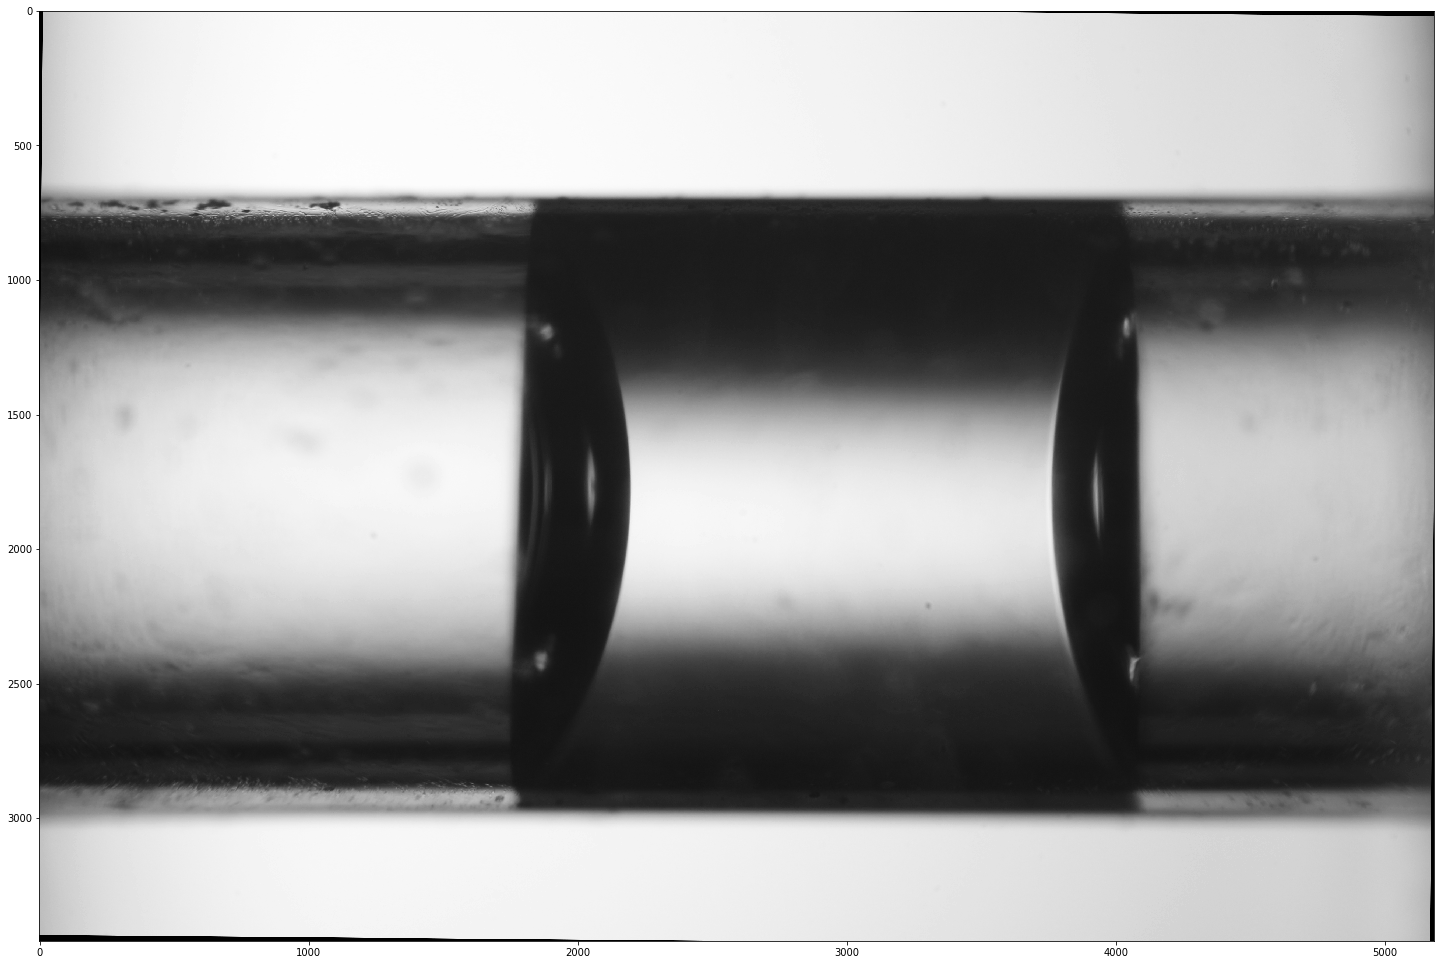

In [7]:
fig01 = plt.figure(1, figsize=(25, 30), dpi=90)
plt.subplot(111)
plt.imshow(rot_img, cmap = 'gray')
plt.show()

## Crop the image to decrease the computational cost:

In [8]:
y_up_crop = 200; y_down_crop = 3100; 
x_left_crop = 1000; x_right_crop = 4200;
cropped_img = rot_img[y_up_crop:y_down_crop, x_left_crop:x_right_crop]

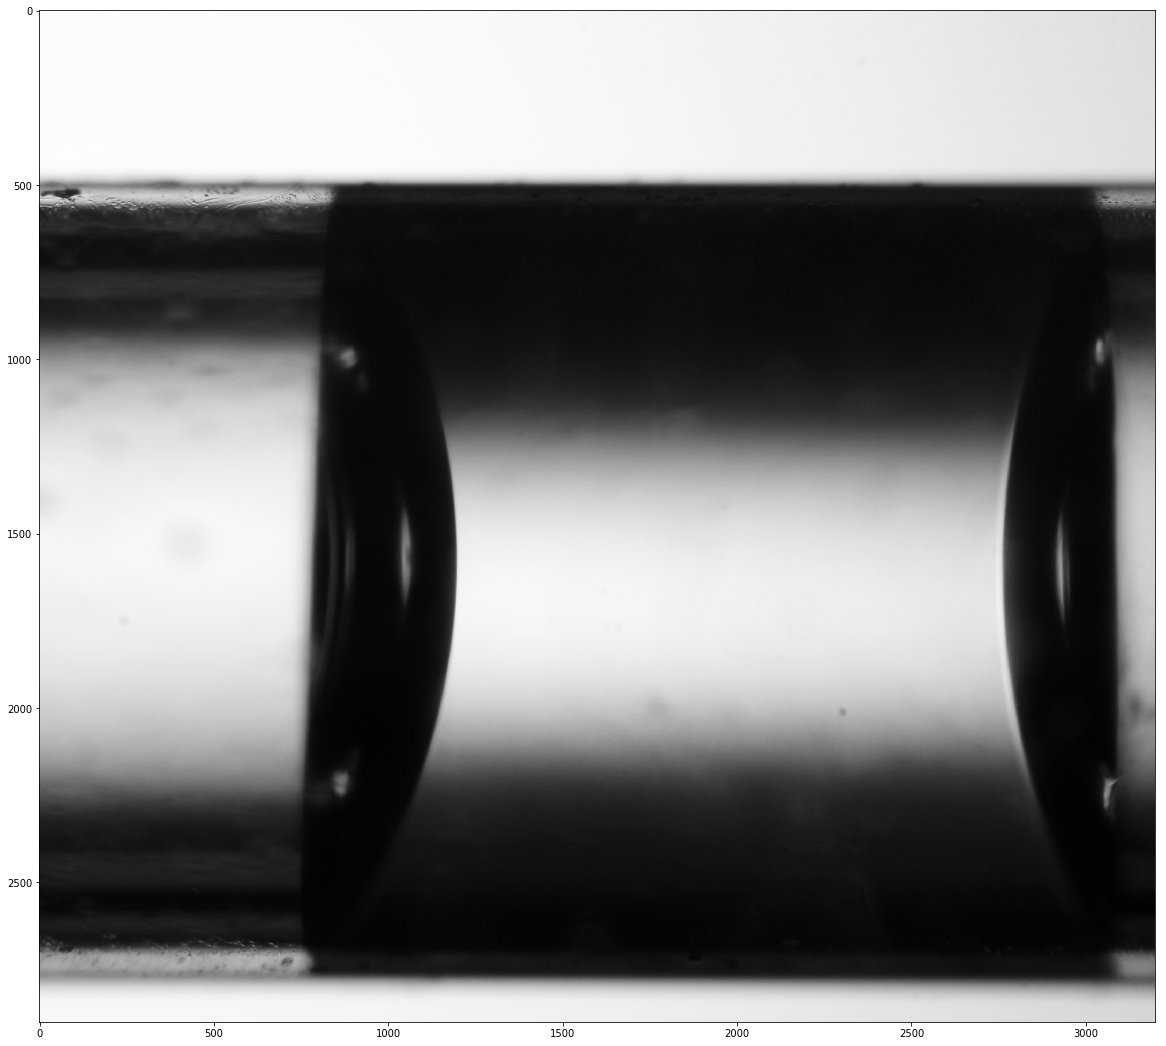

In [9]:
fig01 = plt.figure(1, figsize=(20, 30), dpi=90)
plt.subplot(111)
plt.imshow(cropped_img, cmap = 'gray')
plt.show()

## Manually finding the number of pixels corresponding to the OD:

- **Use cursor location to find the pixels associated with the tube edges**

<IPython.core.display.Javascript object>


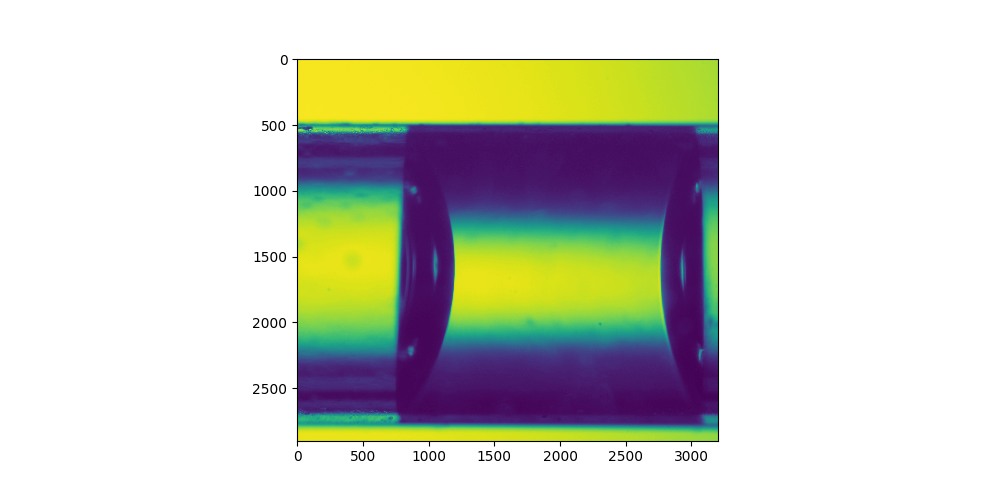

In [10]:
%matplotlib notebook
fig01 = plt.figure(1, figsize=(10, 5), dpi=90)
plt.subplot(111)
plt.imshow(cropped_img)
plt.show()

In [11]:
%matplotlib inline

### Draw a rectangle as a measure line on OD:

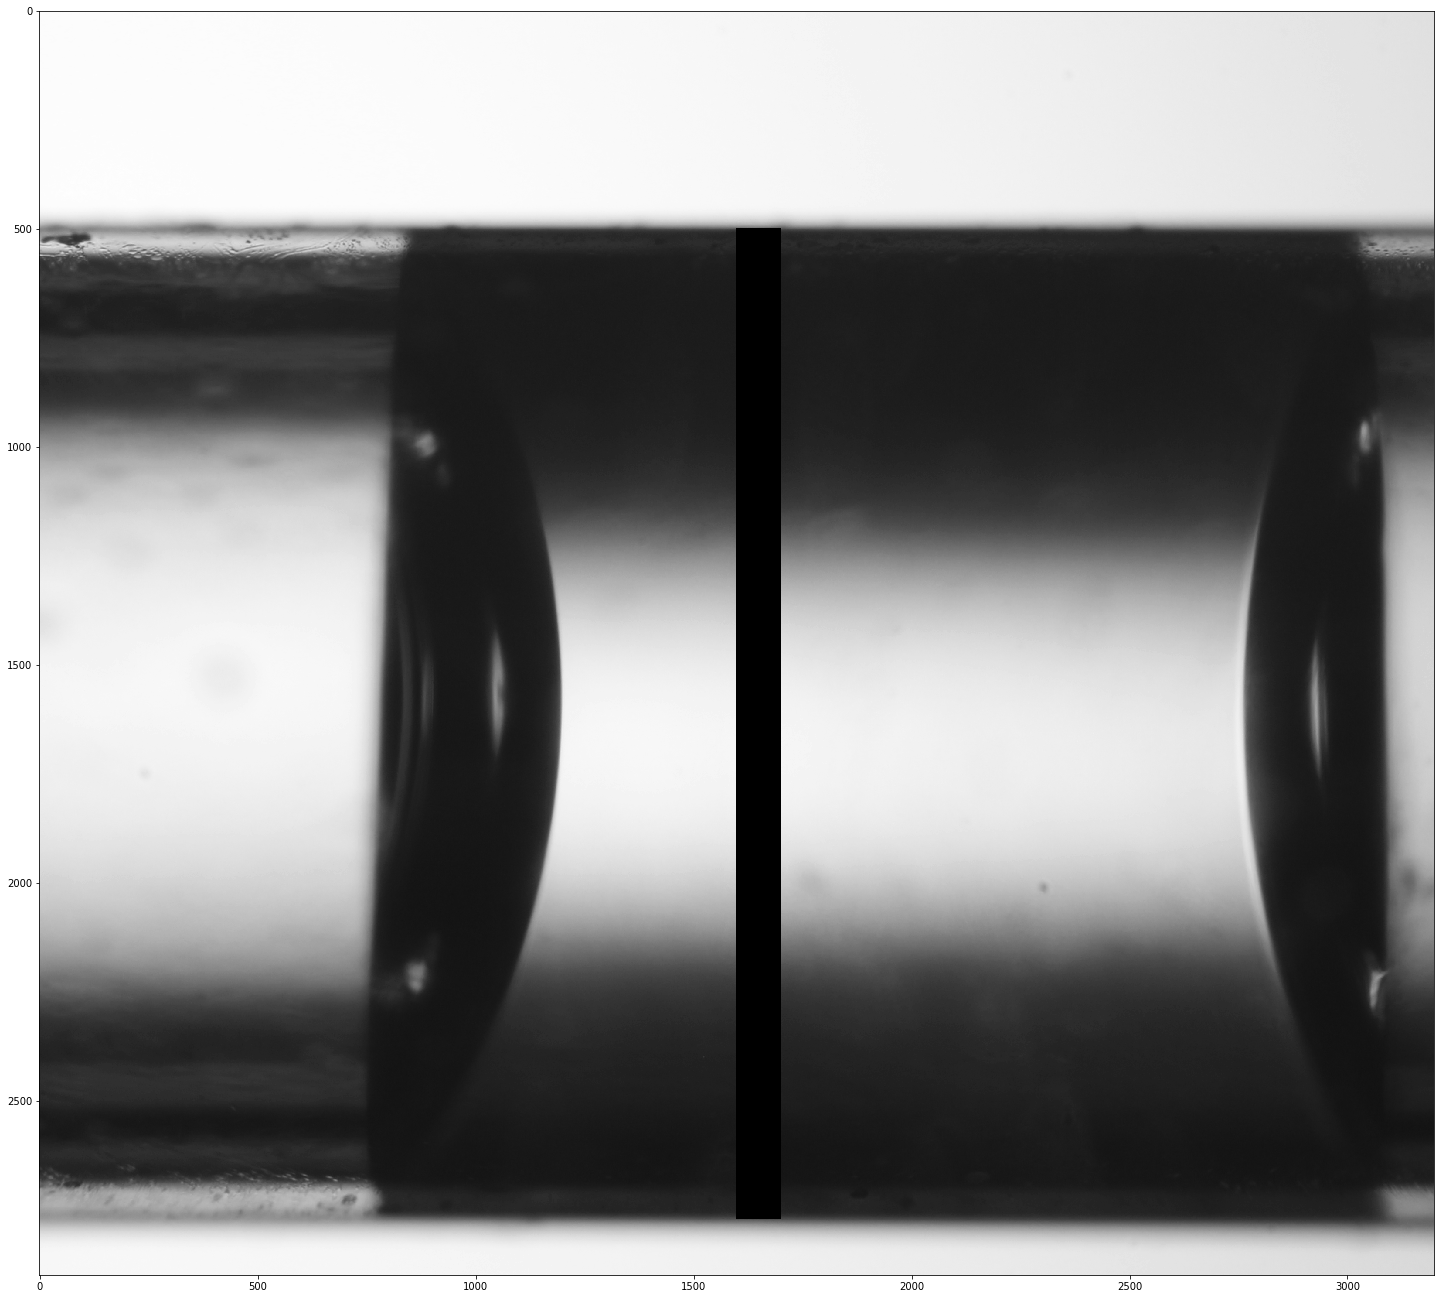

In [21]:
# make a copy of the image
scale_img = cropped_img.copy()

# create a rectangle as the measure line for OD
top_y = 500;
bot_y = 2770;
#
rows, cols = scale_img.shape
width_rec = 100 
top_left = (cols/2, top_y)
bottom_right = (cols/2 + width_rec, bot_y)
#
color = (0, 0, 100)
#
cv2.rectangle(scale_img, top_left, bottom_right, color, -1)
###
fig01 = plt.figure(1, figsize=(25, 40), dpi=90)
plt.subplot(111)
plt.imshow(scale_img, cmap= 'gray')
plt.show()

### Define the pixel per mm value:

In [17]:
OD = 2 #in mm
pix_per_mm = int((bot_y-top_y)/OD)
print "There are %r pixels in 1mm" %pix_per_mm

There are 1135 pixels in 1mm


## Add a scale to the image:

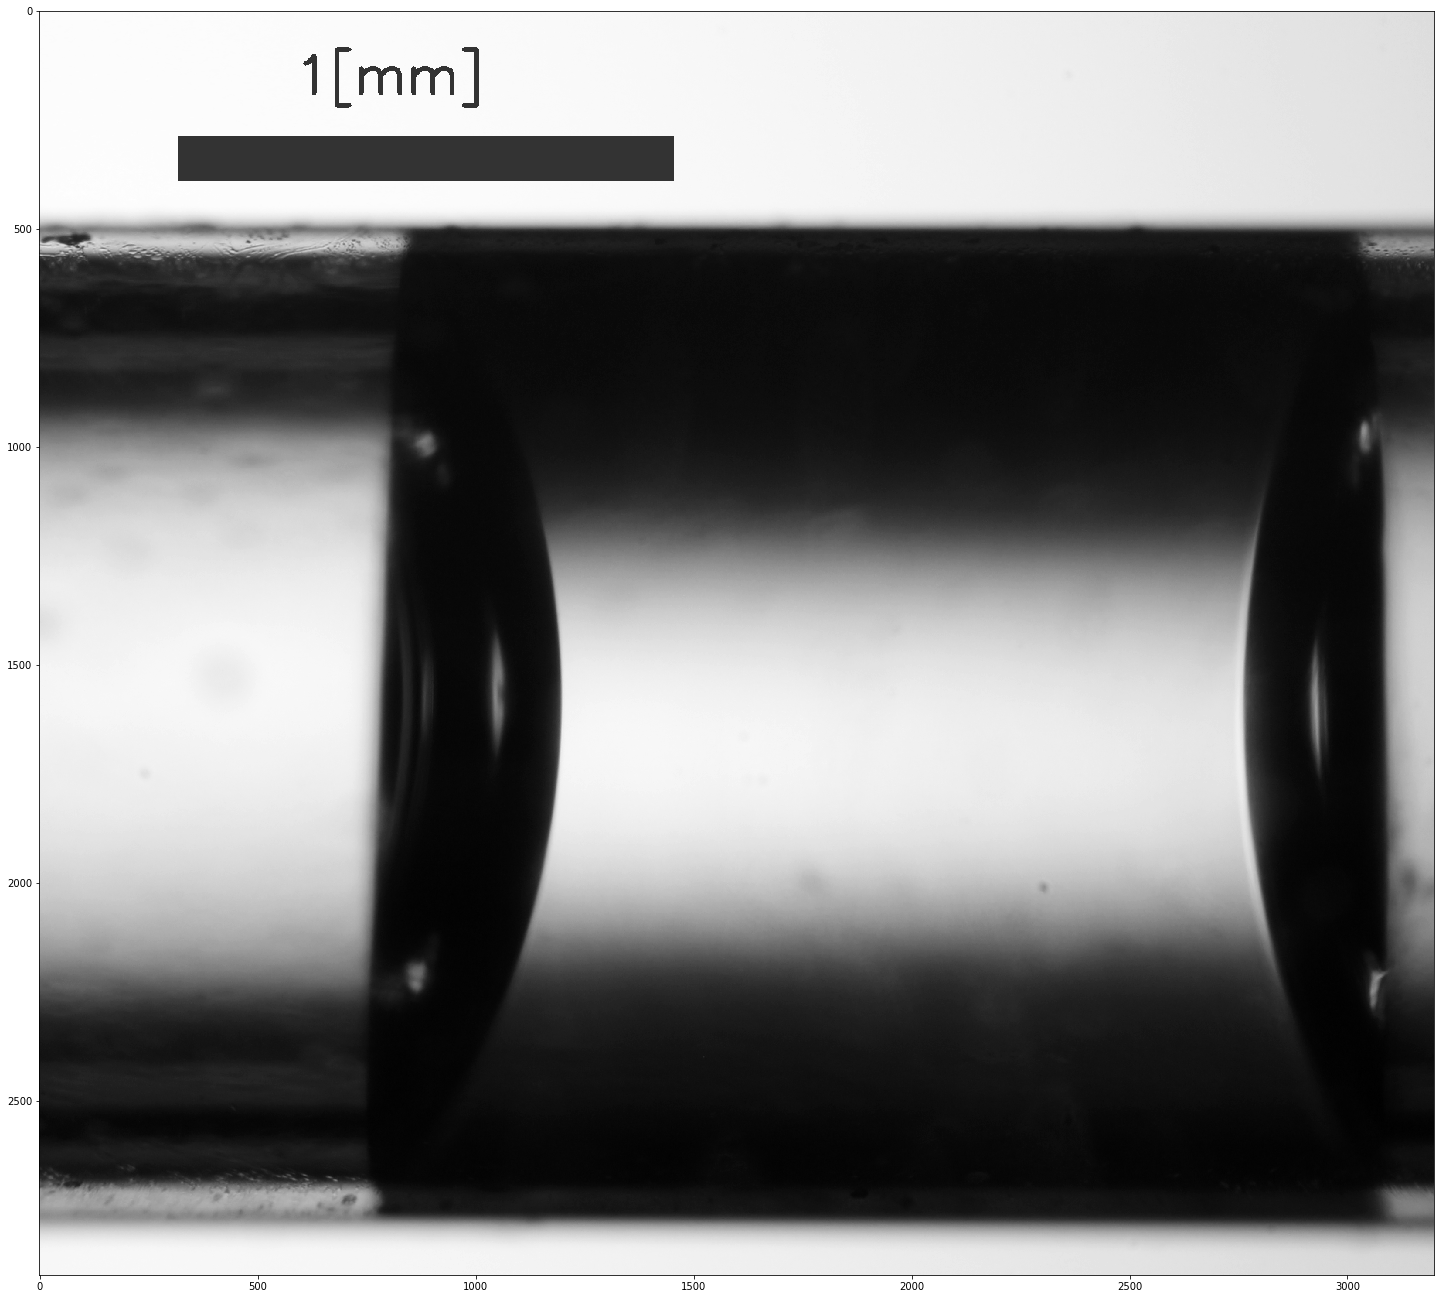

In [27]:
scale_img = cropped_img.copy()
rows, cols = scale_img.shape

# scale position, thickness, text position
left_x_scale = cols/10;
right_x_scale = cols/10 + pix_per_mm;
thickness = 100
top_left = (left_x_scale, rows/10)
bottom_right = (right_x_scale, rows/10 + thickness)
color = (64, 171, 243)
cv2.rectangle(scale_img, top_left, bottom_right, color, -1)
#
text_loc = ((left_x_scale+right_x_scale)/2-300, rows/10-100)
font = cv2.FONT_HERSHEY_SIMPLEX
font_size = 4
cv2.putText(scale_img, '1[mm]', text_loc, font, font_size, color, thickness=10)

#
fig01 = plt.figure(1, figsize=(25, 40), dpi=90)
plt.subplot(111)
plt.imshow(scale_img, cmap = 'gray')
plt.show()

## Add a timestamp:

In [29]:
# Following function takes input as seconds and changes it to hr:min:sec format
def time_format(time): 
    # TIME IN SECONDS IS THE INPUT
    hr = time/3600
    hr_str = '{0:02}'.format(hr)
    time = time - hr * 3600
    minute = time / 60
    minute_str = '{0:02}'.format(minute)
    sec = time - minute * 60
    sec_str = '{0:02}'.format(sec)
    return [hr_str, minute_str, sec_str]

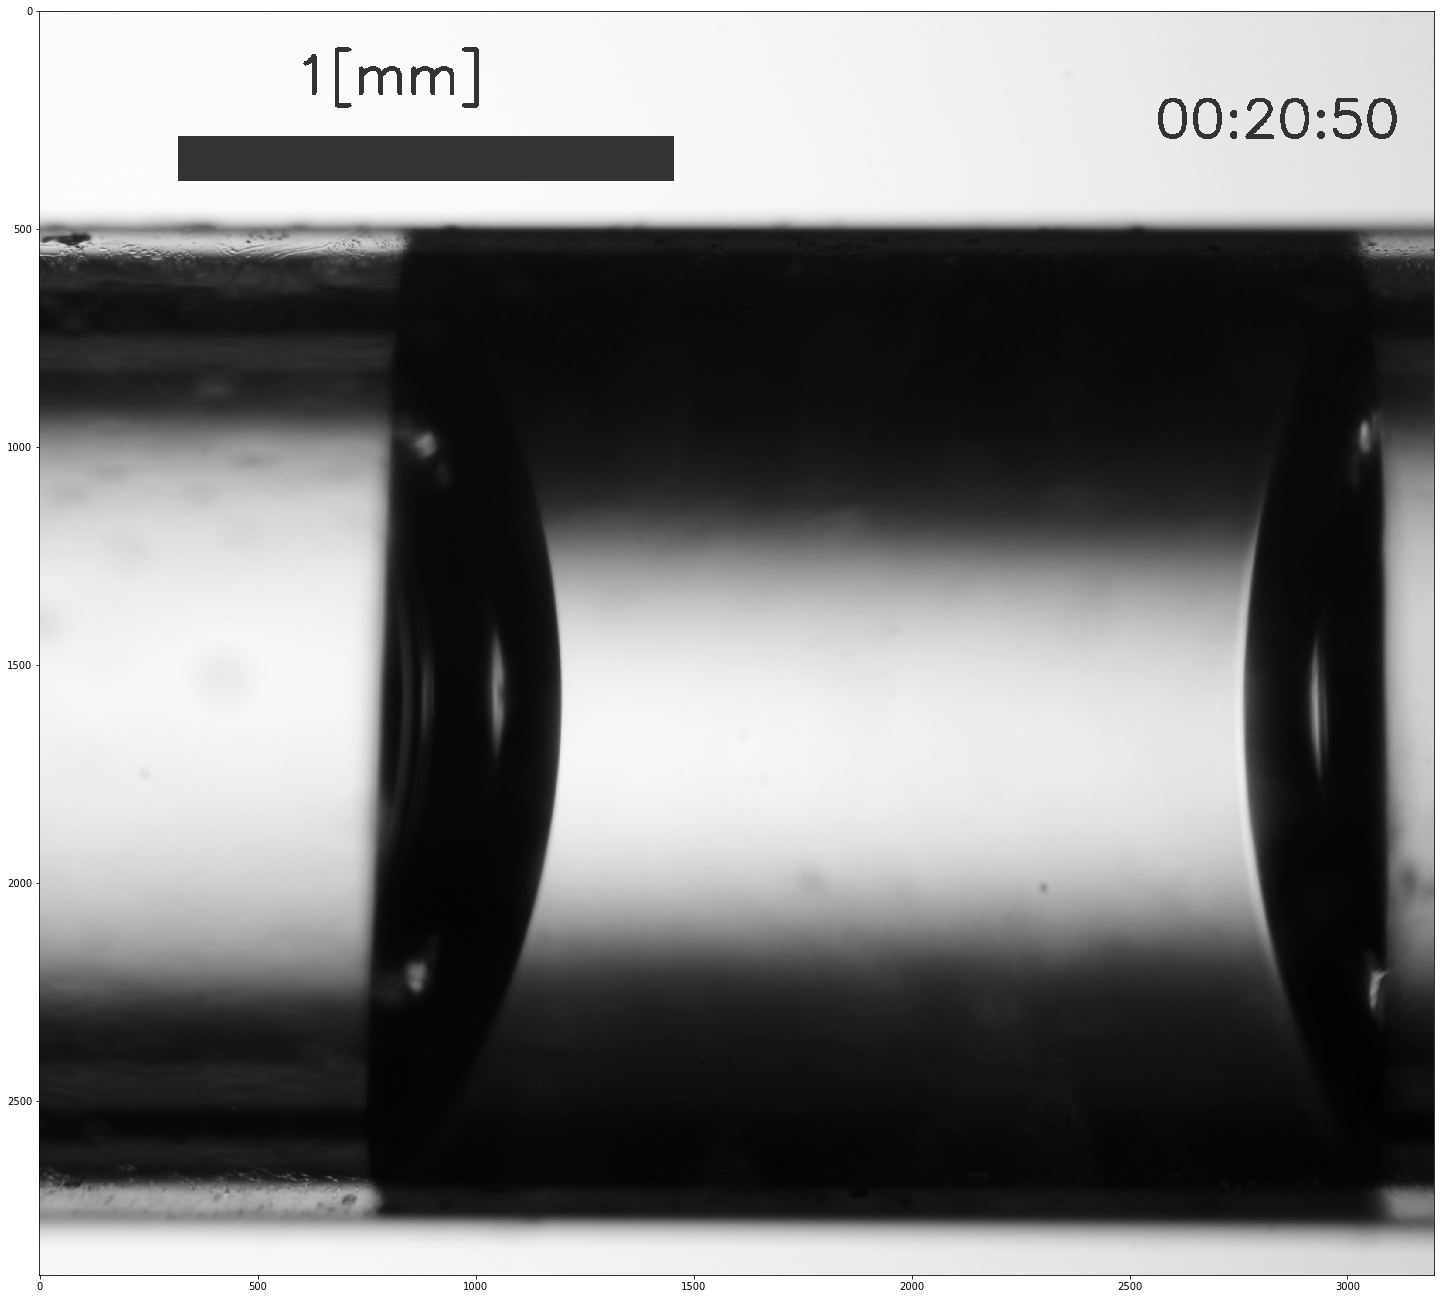

In [35]:
time_img = scale_img.copy()
# Assuming the image is taken at t=1250 secs
t = time_format(1250)
# timestamp location
x_time = 4*cols/5; y_time = rows/10
cv2.putText(time_img, t[0] + ':' + t[1] + ':' + t[2], (x_time, y_time), font, font_size, color, thickness=10)

fig01 = plt.figure(1, figsize=(25, 40), dpi=90)
plt.subplot(111)
plt.imshow(time_img, cmap = 'gray')
plt.show()

## If everything looks good, let's apply to all images and save the results:

In [40]:
path_read = './Data/read-crop-rotate/raw-images/'
path_write = './Data/read-crop-rotate/processed-images/'

start_no = 39 # first pic number
end_no = 59 # last pic number
time_step = 40 # 

for i in xrange(start_no, end_no + 1):
    # Read image
    ext = '{0:04}'.format(i)
    img = cv2.imread(path_read + 'IMG_' + ext + '.JPG', 0)
    #
    rot_img = rotateImage(img, rot_angle)
    #
    cropped_img = rot_img[y_up_crop:y_down_crop, x_left_crop:x_right_crop]
   
    cv2.rectangle(cropped_img, top_left, bottom_right, color, -1)
    cv2.putText(cropped_img, '1[mm]', text_loc, font, font_size, color, thickness=10)
    #
    t = time_format((i-start_no) * time_step)
    cv2.putText(cropped_img, t[0] + ':' + t[1] + ':' + t[2], (x_time, y_time), font, font_size, color, thickness=10)
    #
    cv2.imwrite(path_write + 'IMG_' + ext + '.JPG' , cropped_img)

## Use ffmpeg to make the movies:
- **Create a slideshow using sequance of images that starts with IMG_0039**
- **Make sure the scale is appropriate to the size of picture and the height and width are divisible by 2**
- **The full-size image here is 3200*2900 and we will produce 800*725**
- **To do so run the following code in your terminal in your processed-image folder**

`ffmpeg -framerate 1/0.25 -start_number 39  -i IMG_%04d.JPG -vf scale=800:726 -c:v libx264 -r 25 -pix_fmt yuv420p movie.mp4`

- **For more information about the above ffmpeg code check [ffmpeg-slideshow](https://trac.ffmpeg.org/wiki/Slideshow)**

## This notebook is prepared by 
- **Amir Amini [Github](https://github.com/amirhamini)**